<a href="https://colab.research.google.com/github/noora20FH/PCVK/blob/week11/week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PRACTICUM
Noora Aulia Hidayat

2041720046

TI - 3I

https://github.com/noora20FH/PCVK/blob/week11/week11.ipynb

not recomended to tran Neural Network using your own device but using cloud

In [1]:
from google.colab import drive


#Access my google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import PIL.Image

#TEMPLATE MATCHING

##cv.TM_SQDIFF

In [ ]:
# Read the original image and template
img_ori_ = cv.imread('/content/drive/MyDrive/cats_and_bunnies.jpg')
img_template_ = cv.imread('/content/drive/MyDrive/cat2_templatejpg.jpg')

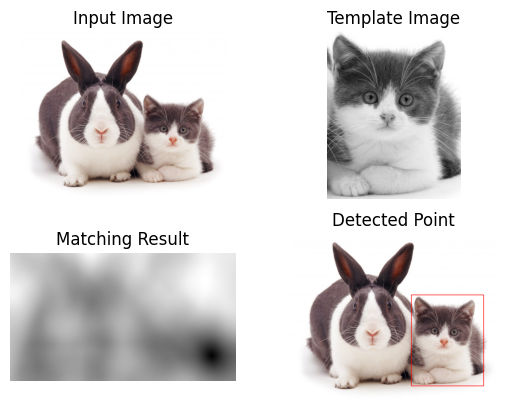

In [ ]:
plt.subplot(221), plt.imshow(cv.cvtColor(img_ori_, cv.COLOR_BGR2RGB))
plt.title('Input Image'), plt.axis('off')

# Convert the images to grayscale
img_ori_gray_ = cv.cvtColor(img_ori_, cv.COLOR_BGR2GRAY)
img_template_gray_ = cv.cvtColor(img_template_, cv.COLOR_BGR2GRAY)

# Perform template matching using TM_SQDIFF method
result_ = cv.matchTemplate(img_ori_gray_, img_template_gray_, cv.TM_SQDIFF)

# Find the minimum value and its location in the result
min_val, _, min_loc, _ = cv.minMaxLoc(result_)

# Get the top-left corner coordinates of the template in the original image
top_left = min_loc

# Draw a rectangle around the matched region
height, width = img_template_gray_.shape
bottom_right = (top_left[0] + width, top_left[1] + height)
cv.rectangle(img_ori_, top_left, bottom_right, (0, 0, 255), 2)

# Display the input image, template image, matching result, and detected point

plt.subplot(222), plt.imshow(cv.cvtColor(img_template_gray_, cv.COLOR_BGR2RGB))
plt.title('Template Image'), plt.axis('off')
plt.subplot(223), plt.imshow(result_, cmap='gray')
plt.title('Matching Result'), plt.axis('off')
plt.subplot(224), plt.imshow(cv.cvtColor(img_ori_, cv.COLOR_BGR2RGB))
plt.title('Detected Point'), plt.axis('off')
# plt.scatter(top_left[0], top_left[1], color='r', marker='x')
plt.show()


##TM_SQDIFF_NORMED

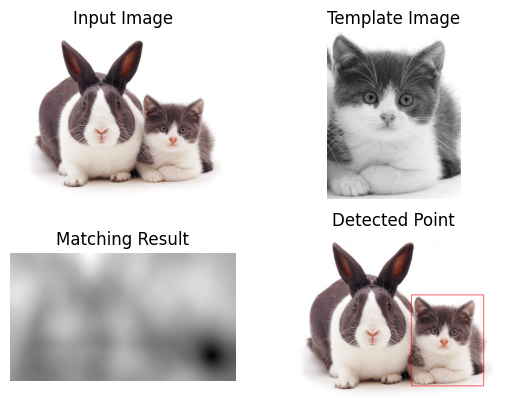

In [ ]:
# Read the original image and template
img_ori1 = cv.imread('/content/drive/MyDrive/cats_and_bunnies.jpg')
img_template1 = cv.imread('/content/drive/MyDrive/cat2_templatejpg.jpg')


plt.subplot(221), plt.imshow(cv.cvtColor(img_ori1, cv.COLOR_BGR2RGB))
plt.title('Input Image'), plt.axis('off')

# Convert the images to grayscale
img_ori_gray = cv.cvtColor(img_ori1, cv.COLOR_BGR2GRAY)
img_template_gray = cv.cvtColor(img_template1, cv.COLOR_BGR2GRAY)

# Perform template matching using TM_SQDIFF method
result1 = cv.matchTemplate(img_ori_gray, img_template_gray, cv.TM_SQDIFF_NORMED)

# Find the minimum value and its location in the result
min_val, _, min_loc, _ = cv.minMaxLoc(result1)

# Get the top-left corner coordinates of the template in the original image
top_left = min_loc

# Draw a rectangle around the matched region
height, width = img_template_gray.shape
bottom_right = (top_left[0] + width, top_left[1] + height)
cv.rectangle(img_ori1, top_left, bottom_right, (0, 0, 255), 2)

# Display the input image, template image, matching result, and detected point

plt.subplot(222), plt.imshow(cv.cvtColor(img_template_gray, cv.COLOR_BGR2RGB))
plt.title('Template Image'), plt.axis('off')
plt.subplot(223), plt.imshow(result1, cmap='gray')
plt.title('Matching Result'), plt.axis('off')
plt.subplot(224), plt.imshow(cv.cvtColor(img_ori1, cv.COLOR_BGR2RGB))
plt.title('Detected Point'), plt.axis('off')
# plt.scatter(top_left[0], top_left[1], color='r', marker='x')
plt.show()


###manual calculation

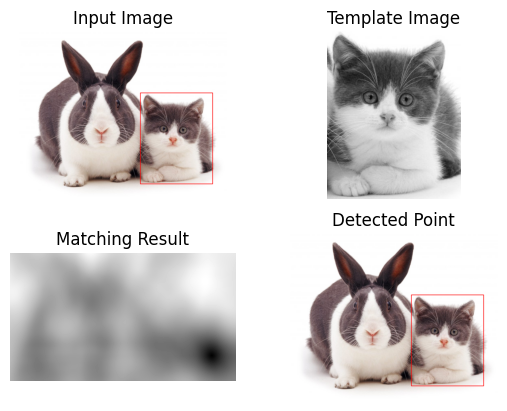

In [ ]:


# Read the original image and template
img_ori1 = cv.imread('/content/drive/MyDrive/cats_and_bunnies.jpg')
img_template1 = cv.imread('/content/drive/MyDrive/cat2_templatejpg.jpg')

# Convert the images to grayscale
img_ori_gray = cv.cvtColor(img_ori1, cv.COLOR_BGR2GRAY)
img_template_gray = cv.cvtColor(img_template1, cv.COLOR_BGR2GRAY)

# Get the dimensions of the images
ori_height, ori_width = img_ori_gray.shape
template_height, template_width = img_template_gray.shape

# Calculate the result using manual TM_SQDIFF_NORMED
result1 = np.zeros((ori_height - template_height + 1, ori_width - template_width + 1), dtype=np.float32)

for y in range(result1.shape[0]):
    for x in range(result1.shape[1]):
        diff = img_ori_gray[y:y + template_height, x:x + template_width].astype(np.float32) - img_template_gray.astype(np.float32)
        result1[y, x] = np.sum(diff ** 2)

# Normalize the result between 0 and 1
result1 = (result1 - np.min(result1)) / (np.max(result1) - np.min(result1))

# Find the minimum value and its location in the result
min_val, _, min_loc, _ = cv.minMaxLoc(result1)

# Get the top-left corner coordinates of the template in the original image
top_left = min_loc

# Draw a rectangle around the matched region
bottom_right = (top_left[0] + template_width, top_left[1] + template_height)
cv.rectangle(img_ori1, top_left, bottom_right, (0, 0, 255), 2)

# Display the input image, template image, matching result, and detected point
plt.subplot(221), plt.imshow(cv.cvtColor(img_ori1, cv.COLOR_BGR2RGB))
plt.title('Input Image'), plt.axis('off')
plt.subplot(222), plt.imshow(cv.cvtColor(img_template_gray, cv.COLOR_BGR2RGB))
plt.title('Template Image'), plt.axis('off')
plt.subplot(223), plt.imshow(result1, cmap='gray')
plt.title('Matching Result'), plt.axis('off')
plt.subplot(224), plt.imshow(cv.cvtColor(img_ori1, cv.COLOR_BGR2RGB))
plt.title('Detected Point'), plt.axis('off')
plt.show()


##TM_CCORR

###manual calculation

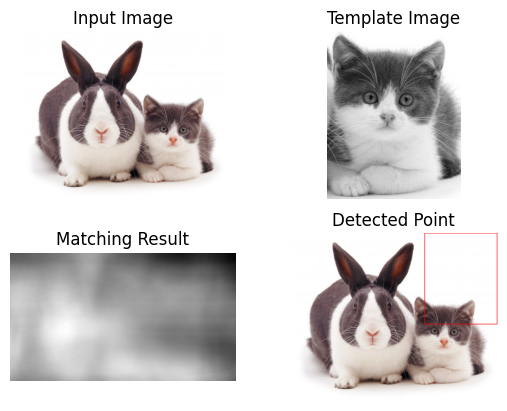

In [ ]:


# Read the original image and template
img_ori = cv.imread('/content/drive/MyDrive/cats_and_bunnies.jpg')
img_template = cv.imread('/content/drive/MyDrive/cat2_templatejpg.jpg')

plt.subplot(221), plt.imshow(cv.cvtColor(img_ori, cv.COLOR_BGR2RGB))
plt.title('Input Image'), plt.axis('off')

# Convert the images to grayscale
img_ori_gray = cv.cvtColor(img_ori, cv.COLOR_BGR2GRAY)
img_template_gray = cv.cvtColor(img_template, cv.COLOR_BGR2GRAY)

# Calculate the dimensions of the images
height_ori, width_ori = img_ori_gray.shape
height_template, width_template = img_template_gray.shape

# Initialize the result matrix
result = np.zeros((height_ori - height_template + 1, width_ori - width_template + 1), dtype=np.float32)

# Perform template matching using TM_CCORR method
for y in range(height_ori - height_template + 1):
    for x in range(width_ori - width_template + 1):
        roi = img_ori_gray[y:y+height_template, x:x+width_template]
        result[y, x] = np.sum(roi * img_template_gray)

# Find the maximum value and its location in the result
max_val, _, max_loc, _ = cv.minMaxLoc(result)

# Get the top-left corner coordinates of the template in the original image
top_left = max_loc

# Draw a rectangle around the matched region
bottom_right = (top_left[0] + width_template, top_left[1] + height_template)
cv.rectangle(img_ori, top_left, bottom_right, (0, 0, 255), 2)

# Display the input image, template image, matching result, and detected point

plt.subplot(222), plt.imshow(cv.cvtColor(img_template_gray, cv.COLOR_BGR2RGB))
plt.title('Template Image'), plt.axis('off')
plt.subplot(223), plt.imshow(result, cmap='gray')
plt.title('Matching Result'), plt.axis('off')
plt.subplot(224), plt.imshow(cv.cvtColor(img_ori, cv.COLOR_BGR2RGB))
plt.title('Detected Point'), plt.axis('off')
plt.show()


##TM_CCORR_NORMED

###manual calculation

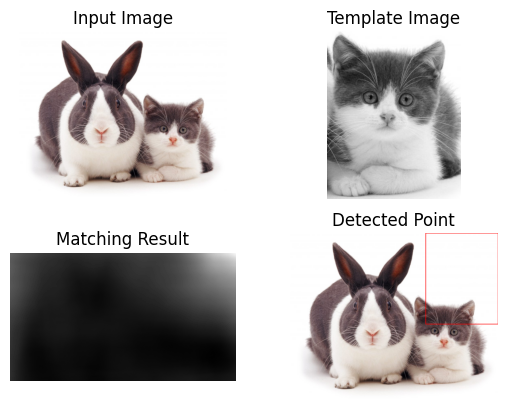

In [ ]:


# Read the original image and template
img_ori = cv.imread('/content/drive/MyDrive/cats_and_bunnies.jpg')
img_template = cv.imread('/content/drive/MyDrive/cat2_templatejpg.jpg')

plt.subplot(221), plt.imshow(cv.cvtColor(img_ori, cv.COLOR_BGR2RGB))
plt.title('Input Image'), plt.axis('off')

# Convert the images to grayscale
img_ori_gray = cv.cvtColor(img_ori, cv.COLOR_BGR2GRAY)
img_template_gray = cv.cvtColor(img_template, cv.COLOR_BGR2GRAY)

# Calculate the dimensions of the images
height_ori, width_ori = img_ori_gray.shape
height_template, width_template = img_template_gray.shape

# Initialize the result matrix
result = np.zeros((height_ori - height_template + 1, width_ori - width_template + 1), dtype=np.float32)

# Perform template matching using TM_CCORR_NORMED method
for y in range(height_ori - height_template + 1):
    for x in range(width_ori - width_template + 1):
        roi = img_ori_gray[y:y+height_template, x:x+width_template]
        result[y, x] = np.sum(roi * img_template_gray) / np.sqrt(np.sum(np.square(roi)) * np.sum(np.square(img_template_gray)))

# Find the maximum value and its location in the result
max_val = np.max(result)
max_loc = np.unravel_index(np.argmax(result), result.shape)

# Get the top-left corner coordinates of the template in the original image
top_left = max_loc[::-1]

# Draw a rectangle around the matched region
bottom_right = (top_left[0] + width_template, top_left[1] + height_template)
cv.rectangle(img_ori, top_left, bottom_right, (0, 0, 255), 2)

# Display the input image, template image, matching result, and detected point
plt.subplot(222), plt.imshow(cv.cvtColor(img_template_gray, cv.COLOR_GRAY2RGB))
plt.title('Template Image'), plt.axis('off')
plt.subplot(223), plt.imshow(result, cmap='gray')
plt.title('Matching Result'), plt.axis('off')
plt.subplot(224), plt.imshow(cv.cvtColor(img_ori, cv.COLOR_BGR2RGB))
plt.title('Detected Point'), plt.axis('off')
plt.show()


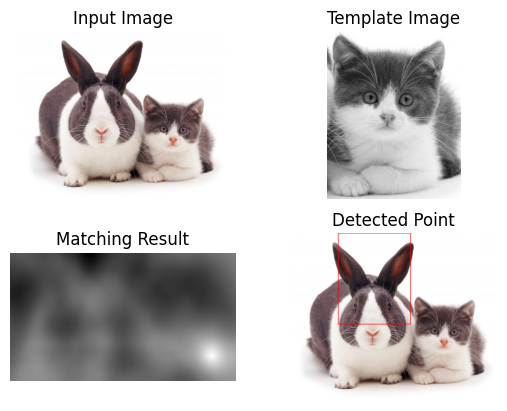

In [ ]:


# Read the original image and template
img_ori3 = cv.imread('/content/drive/MyDrive/cats_and_bunnies.jpg')
img_template3 = cv.imread('/content/drive/MyDrive/cat2_templatejpg.jpg')

plt.subplot(221), plt.imshow(cv.cvtColor(img_ori3, cv.COLOR_BGR2RGB))
plt.title('Input Image'), plt.axis('off')

# Convert the images to grayscale
img_ori_gray3 = cv.cvtColor(img_ori3, cv.COLOR_BGR2GRAY)
img_template_gray3 = cv.cvtColor(img_template3, cv.COLOR_BGR2GRAY)

# Perform template matching using TM_CCORR method
result3 = cv.matchTemplate(img_ori_gray3, img_template_gray3, cv.TM_CCORR_NORMED)

# Find the maximum value and its location in the result
max_val, _, max_loc, _ = cv.minMaxLoc(result3)

# Get the top-left corner coordinates of the template in the original image
top_left = max_loc

# Draw a rectangle around the matched region
height, width = img_template_gray3.shape
bottom_right = (top_left[0] + width, top_left[1] + height)
cv.rectangle(img_ori3, top_left, bottom_right, (0, 0, 255), 2)

# Display the input image, template image, matching result, and detected point
plt.subplot(222), plt.imshow(cv.cvtColor(img_template_gray3, cv.COLOR_BGR2RGB))
plt.title('Template Image'), plt.axis('off')
plt.subplot(223), plt.imshow(result3, cmap='gray')
plt.title('Matching Result'), plt.axis('off')
plt.subplot(224), plt.imshow(cv.cvtColor(img_ori3, cv.COLOR_BGR2RGB))
plt.title('Detected Point'), plt.axis('off')
# plt.scatter(top_left[0], top_left[1], color='r', marker='x')
plt.show()


##TM_CCOEFF

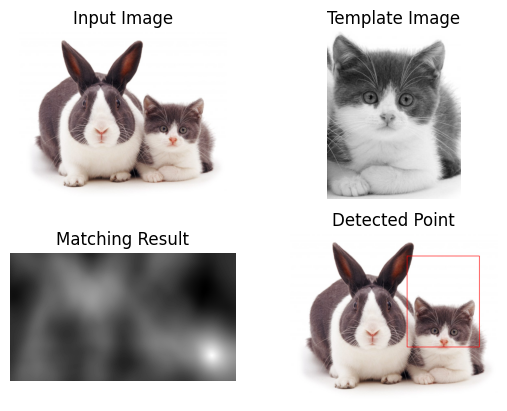

In [ ]:


# Read the original image and template
img_ori4 = cv.imread('/content/drive/MyDrive/cats_and_bunnies.jpg')
img_template4 = cv.imread('/content/drive/MyDrive/cat2_templatejpg.jpg')

plt.subplot(221), plt.imshow(cv.cvtColor(img_ori4, cv.COLOR_BGR2RGB))
plt.title('Input Image'), plt.axis('off')

# Convert the images to grayscale
img_ori_gray4 = cv.cvtColor(img_ori4, cv.COLOR_BGR2GRAY)
img_template_gray4 = cv.cvtColor(img_template4, cv.COLOR_BGR2GRAY)

# Perform template matching using TM_CCORR method
result4 = cv.matchTemplate(img_ori_gray4, img_template_gray4, cv.TM_CCOEFF)

# Find the maximum value and its location in the result
max_val, _, max_loc, _ = cv.minMaxLoc(result4)

# Get the top-left corner coordinates of the template in the original image
top_left = max_loc

# Draw a rectangle around the matched region
height, width = img_template_gray4.shape
bottom_right = (top_left[0] + width, top_left[1] + height)
cv.rectangle(img_ori4, top_left, bottom_right, (0, 0, 255), 2)

# Display the input image, template image, matching result, and detected point
plt.subplot(222), plt.imshow(cv.cvtColor(img_template_gray4, cv.COLOR_BGR2RGB))
plt.title('Template Image'), plt.axis('off')
plt.subplot(223), plt.imshow(result4, cmap='gray')
plt.title('Matching Result'), plt.axis('off')
plt.subplot(224), plt.imshow(cv.cvtColor(img_ori4, cv.COLOR_BGR2RGB))
plt.title('Detected Point'), plt.axis('off')
# plt.scatter(top_left[0], top_left[1], color='r', marker='x')
plt.show()


##TM_CCOEFF_NORMED

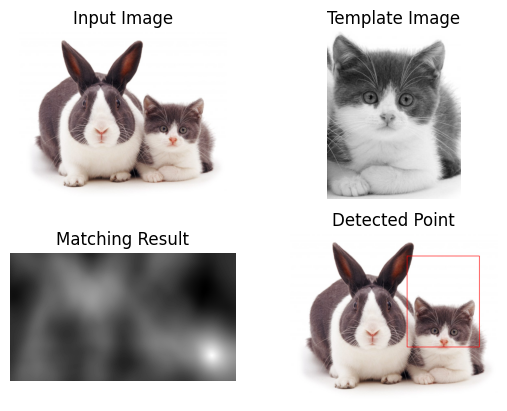

In [ ]:


# Read the original image and template
img_ori5 = cv.imread('/content/drive/MyDrive/cats_and_bunnies.jpg')
img_template5 = cv.imread('/content/drive/MyDrive/cat2_templatejpg.jpg')

plt.subplot(221), plt.imshow(cv.cvtColor(img_ori5, cv.COLOR_BGR2RGB))
plt.title('Input Image'), plt.axis('off')

# Convert the images to grayscale
img_ori_gray5 = cv.cvtColor(img_ori5, cv.COLOR_BGR2GRAY)
img_template_gray5 = cv.cvtColor(img_template5, cv.COLOR_BGR2GRAY)

# Perform template matching using TM_CCORR method
result5 = cv.matchTemplate(img_ori_gray5, img_template_gray5, cv.TM_CCOEFF)

# Find the maximum value and its location in the result
max_val, _, max_loc, _ = cv.minMaxLoc(result5)

# Get the top-left corner coordinates of the template in the original image
top_left = max_loc

# Draw a rectangle around the matched region
height, width = img_template_gray5.shape
bottom_right = (top_left[0] + width, top_left[1] + height)
cv.rectangle(img_ori5, top_left, bottom_right, (0, 0, 255), 2)

# Display the input image, template image, matching result, and detected point
plt.subplot(222), plt.imshow(cv.cvtColor(img_template_gray5, cv.TM_CCOEFF_NORMED))
plt.title('Template Image'), plt.axis('off')
plt.subplot(223), plt.imshow(result5, cmap='gray')
plt.title('Matching Result'), plt.axis('off')
plt.subplot(224), plt.imshow(cv.cvtColor(img_ori5, cv.COLOR_BGR2RGB))
plt.title('Detected Point'), plt.axis('off')
# plt.scatter(top_left[0], top_left[1], color='r', marker='x')
plt.show()


#Edge Detection

##Sobel Edge Detection

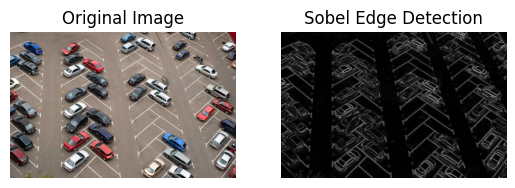

In [ ]:
# Read the original image and template
img_ori = cv.imread('/content/drive/MyDrive/parking-lot-cars.jpg')

# Convert the image to grayscale
img_gray = cv.cvtColor(img_ori, cv.COLOR_BGR2GRAY)

# Apply Sobel edge detection
gradient_x = cv.Sobel(img_gray, cv.CV_64F, 1, 0, ksize=3)
gradient_y = cv.Sobel(img_gray, cv.CV_64F, 0, 1, ksize=3)

# Compute the magnitude and direction of the gradient
gradient_magnitude = cv.magnitude(gradient_x, gradient_y)
gradient_direction = cv.phase(gradient_x, gradient_y, angleInDegrees=True)

# Display the original image and the gradient magnitude
plt.subplot(121), plt.imshow(cv.cvtColor(img_ori, cv.COLOR_BGR2RGB))
plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Sobel Edge Detection'), plt.axis('off')
plt.show()


##Canny edge detection

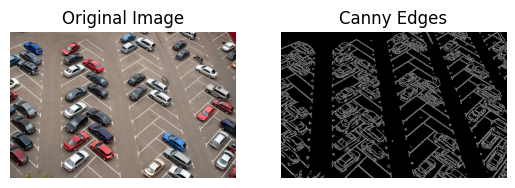

In [ ]:

# Read the image
img_ori = cv.imread('/content/drive/MyDrive/parking-lot-cars.jpg')

# Convert the image to grayscale
img_gray = cv.cvtColor(img_ori, cv.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv.Canny(img_gray, threshold1=100, threshold2=200)

# Display the original image and Canny edges
plt.subplot(121), plt.imshow(cv.cvtColor(img_ori, cv.COLOR_BGR2RGB))
plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Canny Edges'), plt.axis('off')
plt.show()


##Laplacian Edge Detection

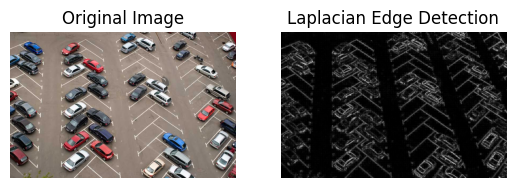

In [ ]:

# Read the image
img_ori = cv.imread('/content/drive/MyDrive/parking-lot-cars.jpg')

# Convert the image to grayscale
img_gray = cv.cvtColor(img_ori, cv.COLOR_BGR2GRAY)

# Apply Laplacian edge detection
laplacian = cv.Laplacian(img_gray, cv.CV_64F)

# Normalize the result to display it properly
laplacian_normalized = cv.convertScaleAbs(laplacian)

# Display the original image and the Laplacian edge detection result
plt.subplot(121), plt.imshow(cv.cvtColor(img_ori, cv.COLOR_BGR2RGB))
plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(laplacian_normalized, cmap='gray')
plt.title('Laplacian Edge Detection'), plt.axis('off')
plt.show()


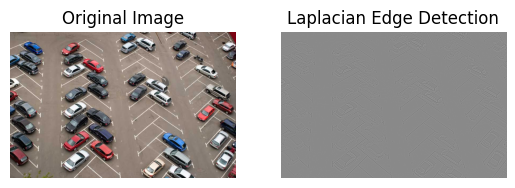

In [ ]:


# Read the image
img_ori = cv.imread('/content/drive/MyDrive/parking-lot-cars.jpg')

# Convert the image to grayscale
img_gray = cv.cvtColor(img_ori, cv.COLOR_BGR2GRAY)

# Apply Laplacian edge detection
laplacian = cv.Laplacian(img_gray, cv.CV_64F)

# Normalize the result to display it properly
laplacian_normalized = cv.normalize(laplacian, None, 0, 255, cv.NORM_MINMAX, dtype=cv.CV_8U)

# Display the original image and the Laplacian edge detection result
plt.subplot(121), plt.imshow(cv.cvtColor(img_ori, cv.COLOR_BGR2RGB))
plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(laplacian_normalized, cmap='gray')
plt.title('Laplacian Edge Detection'), plt.axis('off')
plt.show()


#Corner Detection

##Harris Corner Detection

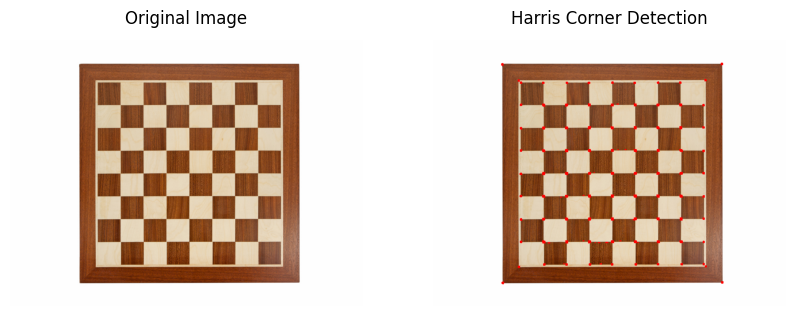

In [ ]:

# Read the image
img_ori = cv.imread('/content/drive/MyDrive/chess-board.jpg')

# Convert the image to grayscale
img_gray = cv.cvtColor(img_ori, cv.COLOR_BGR2GRAY)

# Perform Harris corner detection
dst = cv.cornerHarris(img_gray, blockSize=5, ksize=3, k=0.04)

# Threshold the corner response
dst_thresholded = cv.threshold(dst, 0.01 * dst.max(), 255, cv.THRESH_BINARY)[1]

# Dilate the thresholded image to enhance the corner points
dst_dilated = cv.dilate(dst_thresholded, None)

# Mark the detected corners on a copy of the original image
img_marked = img_ori.copy()
img_marked[dst_dilated > 0.01 * dst_dilated.max()] = [0, 0, 255]  # Red color

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(cv.cvtColor(img_ori, cv.COLOR_BGR2RGB))
plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(cv.cvtColor(img_marked, cv.COLOR_BGR2RGB))
plt.title('Harris Corner Detection'), plt.axis('off')
plt.show()


##Shi-Tomasi Detection

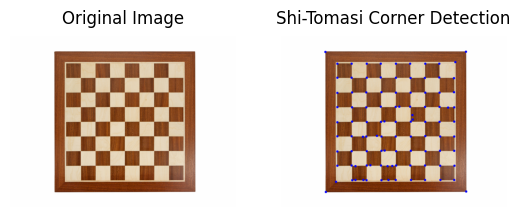

In [ ]:

# Read the image
img_ori = cv.imread('/content/drive/MyDrive/chess-board.jpg')
plt.subplot(121), plt.imshow(cv.cvtColor(img_ori, cv.COLOR_BGR2RGB))


plt.title('Original Image'), plt.axis('off')
# Convert the image to grayscale
img_gray = cv.cvtColor(img_ori, cv.COLOR_BGR2GRAY)

# Perform Shi-Tomasi corner detection
corners = cv.goodFeaturesToTrack(img_gray, maxCorners=100, qualityLevel=0.01, minDistance=10)

# Draw the detected corners on the original image
corners = np.int0(corners)
for corner in corners:
    x, y = corner.ravel()
    cv.circle(img_ori, (x, y), 5, (255, 0, 0), -1)



# Display the results


plt.subplot(122), plt.imshow(cv.cvtColor(img_ori, cv.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Corner Detection'), plt.axis('off')
plt.show()



#Grid Detection 

##Hough Transform method

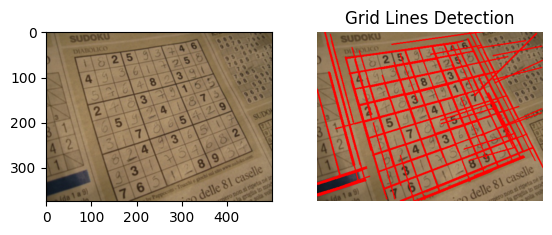

In [10]:

# Load the input image
img_ori = cv.imread('/content/drive/MyDrive/sudoku.jpg')
plt.subplot(121), plt.imshow(cv.cvtColor(img_ori, cv.COLOR_BGR2RGB))

# Preprocess the image (convert to grayscale and apply threshold)
gray = cv.cvtColor(img_ori, cv.COLOR_BGR2GRAY)
thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, 11, 4)

# Apply Hough line transform
lines = cv.HoughLinesP(thresh, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)

# Draw the detected lines on the original image
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv.line(img_ori, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the result
plt.subplot(122), plt.imshow(cv.cvtColor(img_ori, cv.COLOR_BGR2RGB))
plt.title('Grid Lines Detection'), plt.axis('off')

plt.show()


#Contour Detection

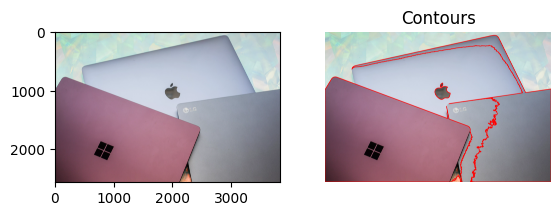

In [26]:
import cv2 as cv
import numpy as np

# Load the image
img_ori = cv.imread('/content/drive/MyDrive/laptop.jpg')

plt.subplot(121), plt.imshow(cv.cvtColor(img_ori, cv.COLOR_BGR2RGB))

# Convert the image to grayscale
img_gray = cv.cvtColor(img_ori, cv.COLOR_BGR2GRAY)

# Apply thresholding using Otsu's method
_, img_binary = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv.findContours(img_binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Filter the contours based on their area to remove small noise
min_contour_area = 1000  # Adjust this value according to your image
contours = [cnt for cnt in contours if cv.contourArea(cnt) > min_contour_area]

# Draw the contours on the original image
cv.drawContours(img_ori, contours, -1, (0, 0, 255), 10)

# Display the visualization image
plt.subplot(122), plt.imshow(cv.cvtColor(img_ori, cv.COLOR_BGR2RGB))
plt.title('Contours'), plt.axis('off')

plt.show()

